In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [3]:
from numpy.random import rand, randn

In [4]:
n, d, k = 100, 2, 2

In [17]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [103]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    print(sigma[0])
    print(mean[0])
    big_mean_0 = np.ones((1,100))*mean[0]
    big_mean_1 = np.ones((1,100))*mean[1]
    
    big_sigma_9 = np.ones((1,100))
    print(X[:,0]-big_mean_0)
    prob = (1/((2*np.pi)*np.linalg.det(sigma)**0.5))
    prob *= np.exp(-0.5*(X[:,0]-big_mean_0))
    prob *= (np.linalg.inv(sigma)*(X-big_mean_0))
    print(prob)
    
    return 1

In [104]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

[0.01764816 0.        ]
0.6987236606451734
[[-0.11059286  0.19280707 -0.66283408 -0.32004272 -0.0407722  -0.42640726
   0.08427995  0.07652123 -0.58202993 -0.45950544  0.15890187 -0.1370368
   0.07152827 -0.0674706  -0.23768426 -0.01931254 -0.42992842  0.07272148
  -0.36951725 -0.43509483 -0.07187022 -0.3801441  -0.44074907 -0.53709495
   0.12709992  0.03557686  0.07996424  0.08734778 -0.03423446 -0.27308718
  -0.19746582  0.00939243  0.07908487 -0.31891811 -0.1414948  -0.06744199
   0.19251387 -0.35397203 -0.17138606 -0.43043303 -0.65056629 -0.39945178
  -0.36647172  0.21591432 -0.5911164   0.05679994 -0.66318663  0.19228439
   0.22569535  0.07453273  0.12674109 -0.3443777  -0.30365848 -0.32489985
  -0.2827807  -0.03591882  0.02375499  0.26395048  0.10807304 -0.61408536
   0.29787719 -0.46115027  0.06653518  0.21722334 -0.25434833 -0.00473229
   0.0360091   0.24667225 -0.440909    0.14641686 -0.62168739  0.09224135
   0.16766619 -0.59322141 -0.22356732 -0.21273053 -0.31694029  0.03774

ValueError: operands could not be broadcast together with shapes (100,2) (1,100) 

In [14]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

0


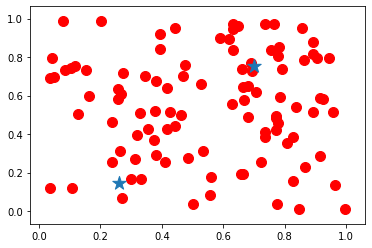

In [15]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()